## <font color = "red">Question 1 : Iris Dataset</font>

## Import Essential Modules :
**Numpy :** <font color = blue>Array based efficient computations</font><br>
**Pandas :** <font color = blue>Manipulation of Datasets</font><br>
**pprint :** <font color = blue>Printing Decision Trees in a linearised way</font><br>

In [59]:
import numpy as np
import math
from tabulate import tabulate
import pprint
import operator
import ipdb
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
eps = np.finfo(float).eps
from numpy import log2 as log

### <font color = "blue">Load Dataset stored in external  file in a pandas DataFrame</font>

In [60]:
def load_preprocess_data(path):
    dataset = pd.read_csv(path, names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class_label'])
    return dataset

### <font color = "blue">Manhattan Distance</font>

In [62]:
def manhattan_distance(p1, p2):
    distance = 0.0
    length = len(p1) - 1
    for i in range(0, length):
        distance += (np.absolute(p1[i] - p2[i]))
    return distance

### <font color = "blue">Euclid Distance</font>

In [63]:
def euclid_distance(p1, p2):
    distance = 0.0
    length = len(p1) - 1
    for i in range(0, length):
        distance += (np.square(p1[i] - p2[i]))
    return np.sqrt(distance)

### <font color = "blue">Minkowski Distance</font>

In [80]:
def minkowski_distance(p1, p2):
    distance = 0.0
    p = 3
    length = len(p1) - 1
    for i in range(0, length):
        distance += np.power(abs(p1[i] - p2[i]),p) 
    distance = np.power(distance , (1/p))
    return distance

### <font color = "blue">Find neighbours of a test point</font>

In [65]:
def get_neighbours(training_set, test_instance, measure):
    distances = []
    if(measure == "euclid"):
        for index, train_instance in training_set.iterrows():
            dist = euclid_distance(train_instance, test_instance)
            label = train_instance["class_label"]
            distances.append([label, dist])
            
    elif(measure == "manhattan"):
         for index, train_instance in training_set.iterrows():
            dist = manhattan_distance(train_instance, test_instance)
            label = train_instance["class_label"]
            distances.append([label, dist])
    else:
        for index, train_instance in training_set.iterrows():
            dist = minkowski_distance(train_instance, test_instance)
            label = train_instance["class_label"]
            distances.append([label, dist])
            
    return sorted(distances, key = operator.itemgetter(1))

In [66]:
def maximum(a, b, c): 
    if (a >= b) and (a >= c): 
        label = "Iris-setosa"
        
    elif (b >= a) and (b >= c): 
        label = "Iris-virginica"
        
    else: 
        label = "Iris-versicolor"
          
    return label

### <font color = "blue">This function keeps track of winner for a test point for all values of 'K' by preprocessing the data</font>

In [67]:
def knn(training_set, test_set, measure):
    predictions = []
    distances = []
    for index, test_instance in test_set.iterrows():
        distances.append((get_neighbours(training_set, test_instance, measure)))
#     print(distances)
    temp = []
    setosa = 0
    virginica = 0
    versicolor = 0
    
    for i in range(0, len(distances)):
        
        length = len(distances[i])
        for j in range(0, length):
            if(distances[i][j][0] == "Iris-setosa"):
                setosa += 1
            elif (distances[i][j][0] == "Iris-virginica"):
                virginica += 1
            else :
                versicolor += 1        
            max_label = maximum(setosa, virginica, versicolor)
            temp.append(max_label)
            
        predictions.append(temp)
        setosa = 0
        virginica = 0
        versicolor = 0
        temp = []
    
    return predictions
        
        

### <font color = "blue">Measure Accuracy, Precision, Recall, F1 Score, Confusion Matrix</font>

In [68]:
def accuracy(k, measure):
    t_pos = 0 
    t_neg = 0
    f_pos = 0
    f_neg = 0
    predicted = []
    
    dataset = load_preprocess_data("./Iris/Iris.csv")
    # train_data = dataset.sample(frac=0.8)
    # val_data = dataset.drop(train_data.index)
    train_data, val_data = np.split(dataset, [int(.8*len(dataset))])
    actual = val_data["class_label"].tolist()
    result = knn(train_data, val_data, measure)
    for i in range(0, len(result)):
        predicted.append(result[i][k - 1])
    
    actual_matrix = pd.Series(actual, name='Actual/Predicted')
    prediction_matrix = pd.Series(predicted, name='Predicted')
    confusion_matrix = pd.crosstab(actual_matrix, prediction_matrix, margins=True)
    return confusion_matrix 

### <font color = "blue">Measure Precision, Recall F1 Score for Setosa</font>

In [69]:
def measure_setosa(matrix):
    t_pos = matrix.iat[0 , 0]
    a_pos = matrix.iat[0, 3]
    p_pos = matrix.iat[3, 0]
    recall = (t_pos / a_pos) * 100
    precision = (t_pos / p_pos) * 100
    f1_score = (1 / recall) + (1 / precision)
    f1_score = (2 / f1_score)
    return (precision , recall , f1_score )

### <font color = "blue">Measure Precision, Recall F1 Score for Versicolor</font>

In [70]:
def measure_versicolor(matrix):
    t_pos = matrix.iat[1, 1]
    a_pos = matrix.iat[1, 3]
    p_pos = matrix.iat[3, 1]
    recall = (t_pos / a_pos) * 100
    precision = (t_pos / p_pos) * 100
    f1_score = (1 / recall) + (1 / precision)
    f1_score = (2 / f1_score)
    return (precision , recall , f1_score )

### <font color = "blue">Measure Precision, Recall F1 Score for Virginica</font>

In [71]:
def measure_virginica(matrix):
    t_pos = matrix.iat[2, 2]
    a_pos = matrix.iat[2, 3]
    p_pos = matrix.iat[3, 2]
    recall = (t_pos / a_pos) * 100
    precision = (t_pos / p_pos) * 100
    f1_score = (1 / recall) + (1 / precision)
    f1_score = (2 / f1_score)
    return (precision , recall , f1_score )

### <font color = "blue">Validate output for test data, print confusion matrix</font>

In [72]:
def validate_robo(measure):
    output = pd.DataFrame(columns = ['K', 'Accuracy', 'Precision Setosa', 'Precision VersiColor', 'Precision Virginica', 'Recall Setosa', 'Recall VersiColor', 'Recall Virginica','F1 Score Setosa', 'F1 Score VersiColor', 'F1 Score Virginica'])
    for k in range(1, 12, 2):
        matrix = accuracy(k, measure)
        print("K = ",k)
        print(tabulate(matrix, headers='keys', tablefmt='psql'))
        print("\n=====================================================================================\n")
        total = (matrix.iat[3,3])
        true_val = matrix.iat[0 , 0] + matrix.iat[1, 1] + matrix.iat[2, 2]
        acc = true_val / total
        precision_setosa , recall_setosa , f1_score_setosa = measure_setosa(matrix)
        precision_versicolor , recall_versicolor , f1_score_versicolor = measure_versicolor(matrix)
        precision_virginica , recall_virginica , f1_score_virginica = measure_virginica(matrix)
        output = output.append({'K':k, 'Accuracy':acc, 'Precision Setosa':precision_setosa, 'Precision VersiColor':precision_versicolor, 'Precision Virginica':precision_virginica, 'Recall Setosa':recall_setosa, 'Recall VersiColor':recall_versicolor, 'Recall Virginica':recall_virginica,'F1 Score Setosa':f1_score_setosa, 'F1 Score VersiColor':f1_score_versicolor, 'F1 Score Virginica':f1_score_virginica}, ignore_index=True)
    return output  

### <font color = "blue">Utility to plot graphs</font>

In [73]:
def plot_graph(data, title):
    plt.rcParams['figure.figsize'] = (8,4)
    data.plot(kind='line',x = 'K',y = 'Accuracy',color = 'blue')
    plt.title(title)
    plt.show()

## Iris Dataset
### DataFrame showing various performance measures using Euclidian Distance for KNN

In [74]:
euclid_result = validate_robo("euclid")
euclid_result

K =  1
+--------------------+---------------+-------------------+------------------+-------+
| Actual/Predicted   |   Iris-setosa |   Iris-versicolor |   Iris-virginica |   All |
|--------------------+---------------+-------------------+------------------+-------|
| Iris-setosa        |            11 |                 0 |                0 |    11 |
| Iris-versicolor    |             0 |                 9 |                1 |    10 |
| Iris-virginica     |             0 |                 0 |                6 |     6 |
| All                |            11 |                 9 |                7 |    27 |
+--------------------+---------------+-------------------+------------------+-------+


K =  3
+--------------------+---------------+-------------------+------------------+-------+
| Actual/Predicted   |   Iris-setosa |   Iris-versicolor |   Iris-virginica |   All |
|--------------------+---------------+-------------------+------------------+-------|
| Iris-setosa        |            11 |

,K,Accuracy,Precision Setosa,Precision VersiColor,Precision Virginica,Recall Setosa,Recall VersiColor,Recall Virginica,F1 Score Setosa,F1 Score VersiColor,F1 Score Virginica
0,1.0,0.962963,100.0,100.0,85.714286,100.0,90.0,100.0,100.0,94.736842,92.307692
1,3.0,0.962963,100.0,100.0,85.714286,100.0,90.0,100.0,100.0,94.736842,92.307692
2,5.0,0.962963,100.0,100.0,85.714286,100.0,90.0,100.0,100.0,94.736842,92.307692
3,7.0,0.962963,100.0,100.0,85.714286,100.0,90.0,100.0,100.0,94.736842,92.307692
4,9.0,1.000000,100.0,100.0,100.000000,100.0,100.0,100.0,100.0,100.000000,100.000000
5,11.0,1.000000,100.0,100.0,100.000000,100.0,100.0,100.0,100.0,100.000000,100.000000


### Graph Plotting : Accuracy vs 'K' value using Euclidian Distance

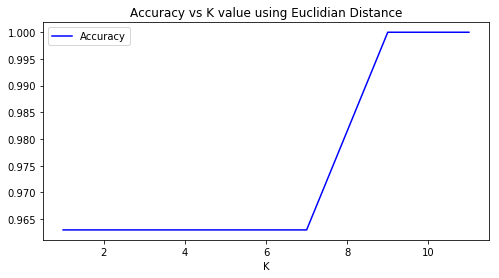

In [75]:
plot_graph(euclid_result, "Accuracy vs K value using Euclidian Distance")

### DataFrame showing various performance measures using Manhattan Distance for KNN

In [76]:
manhattan_result = validate_robo("manhattan")
manhattan_result

K =  1
+--------------------+---------------+-------------------+------------------+-------+
| Actual/Predicted   |   Iris-setosa |   Iris-versicolor |   Iris-virginica |   All |
|--------------------+---------------+-------------------+------------------+-------|
| Iris-setosa        |            11 |                 0 |                0 |    11 |
| Iris-versicolor    |             0 |                 9 |                1 |    10 |
| Iris-virginica     |             0 |                 0 |                6 |     6 |
| All                |            11 |                 9 |                7 |    27 |
+--------------------+---------------+-------------------+------------------+-------+


K =  3
+--------------------+---------------+-------------------+------------------+-------+
| Actual/Predicted   |   Iris-setosa |   Iris-versicolor |   Iris-virginica |   All |
|--------------------+---------------+-------------------+------------------+-------|
| Iris-setosa        |            11 |

,K,Accuracy,Precision Setosa,Precision VersiColor,Precision Virginica,Recall Setosa,Recall VersiColor,Recall Virginica,F1 Score Setosa,F1 Score VersiColor,F1 Score Virginica
0,1.0,0.962963,100.0,100.0,85.714286,100.0,90.0,100.0,100.0,94.736842,92.307692
1,3.0,0.962963,100.0,100.0,85.714286,100.0,90.0,100.0,100.0,94.736842,92.307692
2,5.0,0.925926,100.0,100.0,75.000000,100.0,80.0,100.0,100.0,88.888889,85.714286
3,7.0,0.925926,100.0,100.0,75.000000,100.0,80.0,100.0,100.0,88.888889,85.714286
4,9.0,0.962963,100.0,100.0,85.714286,100.0,90.0,100.0,100.0,94.736842,92.307692
5,11.0,0.925926,100.0,100.0,75.000000,100.0,80.0,100.0,100.0,88.888889,85.714286


### Graph Plotting : Accuracy vs 'K' value using Manhattan Distance

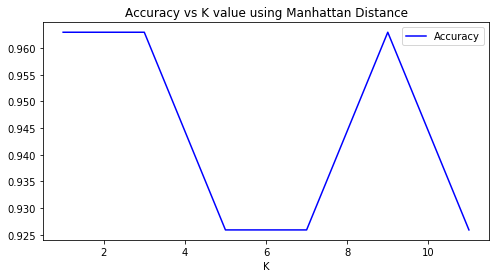

In [77]:
plot_graph(manhattan_result, "Accuracy vs K value using Manhattan Distance")

### DataFrame showing various performance measures using Minkowski Distance for KNN

In [78]:
minkowski_result = validate_robo("minkowski")
minkowski_result

K =  1
+--------------------+---------------+-------------------+------------------+-------+
| Actual/Predicted   |   Iris-setosa |   Iris-versicolor |   Iris-virginica |   All |
|--------------------+---------------+-------------------+------------------+-------|
| Iris-setosa        |            11 |                 0 |                0 |    11 |
| Iris-versicolor    |             0 |                 9 |                1 |    10 |
| Iris-virginica     |             0 |                 0 |                6 |     6 |
| All                |            11 |                 9 |                7 |    27 |
+--------------------+---------------+-------------------+------------------+-------+


K =  3
+--------------------+---------------+-------------------+------------------+-------+
| Actual/Predicted   |   Iris-setosa |   Iris-versicolor |   Iris-virginica |   All |
|--------------------+---------------+-------------------+------------------+-------|
| Iris-setosa        |            11 |

,K,Accuracy,Precision Setosa,Precision VersiColor,Precision Virginica,Recall Setosa,Recall VersiColor,Recall Virginica,F1 Score Setosa,F1 Score VersiColor,F1 Score Virginica
0,1.0,0.962963,100.0,100.0,85.714286,100.0,90.0,100.0,100.0,94.736842,92.307692
1,3.0,0.962963,100.0,100.0,85.714286,100.0,90.0,100.0,100.0,94.736842,92.307692
2,5.0,0.962963,100.0,100.0,85.714286,100.0,90.0,100.0,100.0,94.736842,92.307692
3,7.0,1.000000,100.0,100.0,100.000000,100.0,100.0,100.0,100.0,100.000000,100.000000
4,9.0,1.000000,100.0,100.0,100.000000,100.0,100.0,100.0,100.0,100.000000,100.000000
5,11.0,1.000000,100.0,100.0,100.000000,100.0,100.0,100.0,100.0,100.000000,100.000000


### <font color = "blue">Graph Plotting : Accuracy vs 'K' value using Minkowski Distance</font>

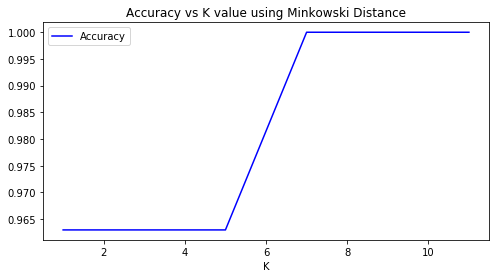

In [79]:
plot_graph(minkowski_result, "Accuracy vs K value using Minkowski Distance")

### <h1 font color = "blue" align = "center"> *********** THE END *************** </font>